In [40]:
# import your favourite libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Climate Change Indicators: Sea Level Rise and Sectoral CO₂ Emissions

This analysis examines two critical dimensions of climate change:

1. **Sea Level Rise**: Historical measurements of global sea level change, showing both the absolute rise and monthly variations

2. **Sectoral CO₂ Emissions**: A breakdown of global carbon dioxide emissions by economic sector, illuminating which human activities contribute most significantly to climate change

By connecting these datasets, we can better understand both the consequences of climate change (rising seas) and the specific human activities driving it (sectoral emissions). This provides a more comprehensive view of the climate crisis and helps identify potential intervention points.

In [103]:
df1 = pd.read_csv('sealevel_data.csv')
df2 = pd.read_csv('co2emissions_bysector.csv')

In [106]:
display(df1.head())
display(df2.head())
print(df1.info())
print(df2.info())

,year,month,monthly_mean,relative_sea_level,high_confidence,low_confidence
date,,,,,,
1886-01-01,1886,1,6.831,6.928,6.935,6.92
1886-02-01,1886,2,6.958,6.928,6.936,6.92
1886-03-01,1886,3,6.978,6.928,6.936,6.92
1886-04-01,1886,4,6.920,6.928,6.936,6.92
1886-05-01,1886,5,6.962,6.928,6.936,6.92


,country,sector,value,timestamp
date,,,,
2019-01-01,Brazil,Power,0.096799,1546300800
2019-01-01,China,Power,14.816100,1546300800
2019-01-01,EU27 & UK,Power,1.886490,1546300800
2019-01-01,France,Power,0.051217,1546300800
2019-01-01,Germany,Power,0.315002,1546300800


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1626 entries, 1886-01-01 to 2022-12-01
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                1626 non-null   int64  
 1   month               1626 non-null   int64  
 2   monthly_mean        1626 non-null   float64
 3   relative_sea_level  1626 non-null   float64
 4   high_confidence     1626 non-null   float64
 5   low_confidence      1626 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 88.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135408 entries, 2019-01-01 to 2023-05-31
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   sector     135408 non-null  object 
 2   value      135408 non-null  float64
 3   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.

## Data Loading and Preparation

For this analysis, we're working with two complementary datasets:

1. **Sea Level Data**: Contains historical measurements of global sea level change, including monthly averages and confidence intervals

2. **CO₂ Emissions by Sector**: Provides a breakdown of carbon dioxide emissions across different economic sectors globally

Both datasets require some preprocessing to standardize column names and create proper datetime indices for time series analysis.

In [105]:
# clean the data -- normalise column names
df1.columns = (
    df1.columns
        .str.strip()
        .str.lower()
        .str.replace(' ', '_')        
)

# create datetimes and set index
# df1
df1['date'] = pd.to_datetime(dict(year=df1['year'], month=df1['month'], day=1))
df1.set_index('date', inplace=True)

# df2
df2['date'] = pd.to_datetime(df2['date'], format="%d/%m/%Y")
df2.set_index('date', inplace=True)

In [107]:
# inspect some of the data
print(df2['sector'].value_counts())

sector
Power                     22568
Industry                  22568
Ground Transport          22568
Residential               22568
Domestic Aviation         22568
International Aviation    22568
Name: count, dtype: int64


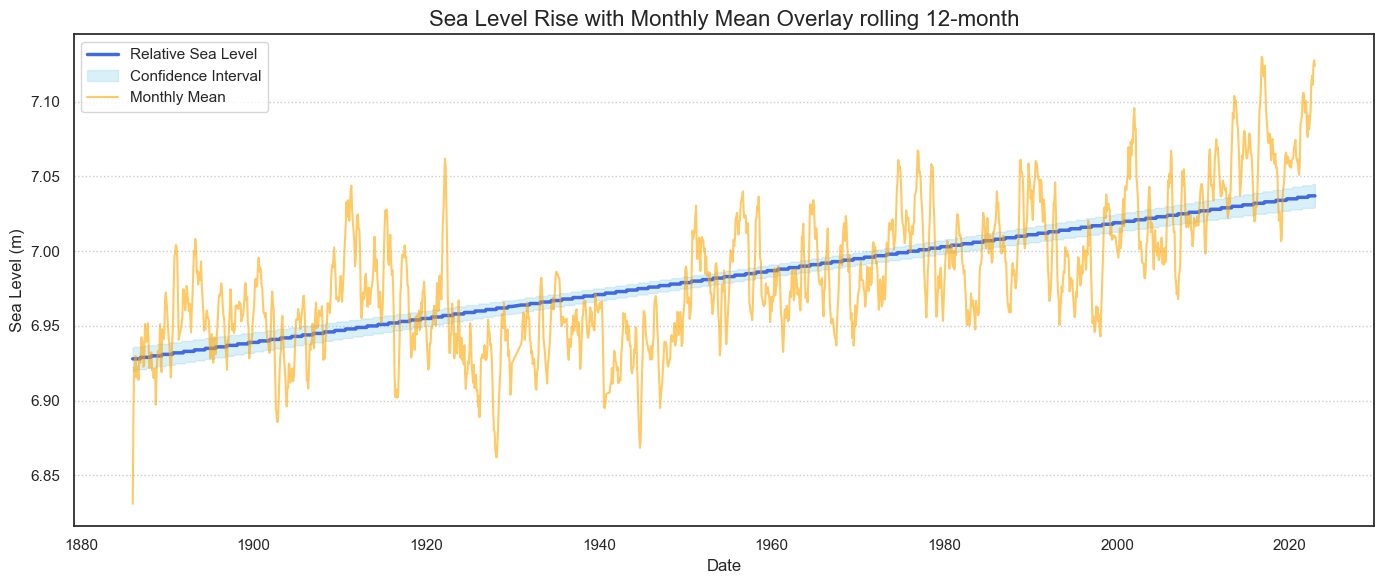

In [108]:
sns.set_theme(style="white")
plt.figure(figsize=(14, 6))

# 12-month rolling mean
df1['monthly_rolling'] = df1['monthly_mean'].rolling(window=6, min_periods=1).mean()

# Main line: Relative sea level
sns.lineplot(data=df1, x=df1.index, y='relative_sea_level', label='Relative Sea Level', color='royalblue', linewidth=2.5)

# Confidence interval
plt.fill_between(
    df1.index,
    df1['low_confidence'],
    df1['high_confidence'],
    color='skyblue',
    alpha=0.3,
    label='Confidence Interval'
)

# Monthly mean overlay
sns.lineplot(data=df1, x=df1.index, y='monthly_rolling', label='Monthly Mean', color='orange', linewidth=1.5, alpha=0.6)

plt.title('Sea Level Rise with Monthly Mean Overlay rolling 12-month', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sea Level (m)')
plt.legend()
plt.grid(axis='y', linestyle=':')
plt.tight_layout()
plt.show()

## Sea Level Rise: Long-Term Trend and Seasonal Variations

The visualization above reveals several critical aspects of global sea level change:

- **Persistent Upward Trend**: The relative sea level (blue line) shows a clear, consistent upward trajectory over the measurement period, providing unambiguous evidence of sea level rise as a consequence of climate change.

- **Confidence Interval**: The shaded blue region represents the statistical uncertainty in the measurements, highlighting the robustness of the upward trend despite natural variability and measurement limitations.

- **Monthly Variations**: The overlaid orange line displays the monthly rolling average, revealing seasonal fluctuations superimposed on the long-term trend. These short-term variations are influenced by factors like seasonal thermal expansion and contraction of ocean water, regional weather patterns, and changes in ocean circulation.

- **Acceleration Indicators**: Looking closely at the slope of the trend line, there are indications that the rate of sea level rise has been accelerating in recent decades, consistent with increased ice sheet melting and ocean warming.

This visualization underscores the reality that sea level rise is not merely a future threat but an ongoing process already measurable with high confidence. The combination of the long-term trend and confidence intervals provides a comprehensive view of both the magnitude and certainty of this critical climate change indicator.

In [109]:
# let's inspect what countries are in the dataset and where they sit
df2.groupby('country')['value'].sum().sort_values(ascending=False)


country
WORLD        155539.622124
China         48003.071381
ROW           46392.618476
US            21631.820344
EU27 & UK     14004.102835
India         11107.959325
Russia         7841.046903
Japan          4722.530409
Germany        2951.018676
Brazil         1836.474832
UK             1605.296587
Italy          1423.104886
France         1328.491333
Spain          1099.732535
Name: value, dtype: float64

## Emissions Dataset: Country Analysis

Before diving into sectoral analysis, we need to understand the structure of our emissions dataset, particularly its geographic organization. The emissions data includes individual countries as well as regional aggregates that need to be handled differently:

- **WORLD**: Global total emissions across all countries and sectors
- **EU27 & UK**: Combined emissions from the European Union and United Kingdom
- **ROW (Rest of World)**: Emissions from countries not individually specified

By examining the overall distribution of emissions by country, we can identify which nations and regions contribute most significantly to global CO₂ output. This context is essential for interpreting the sector-level data that follows.

In [110]:
# separate dataset for country groups
country_groups = {'WORLD', 'ROW', 'EU27 & UK'}

df_group_entities = df2[df2['country'].isin(country_groups)].copy()
df_countries_only = df2[~df2['country'].isin(country_groups)].copy()

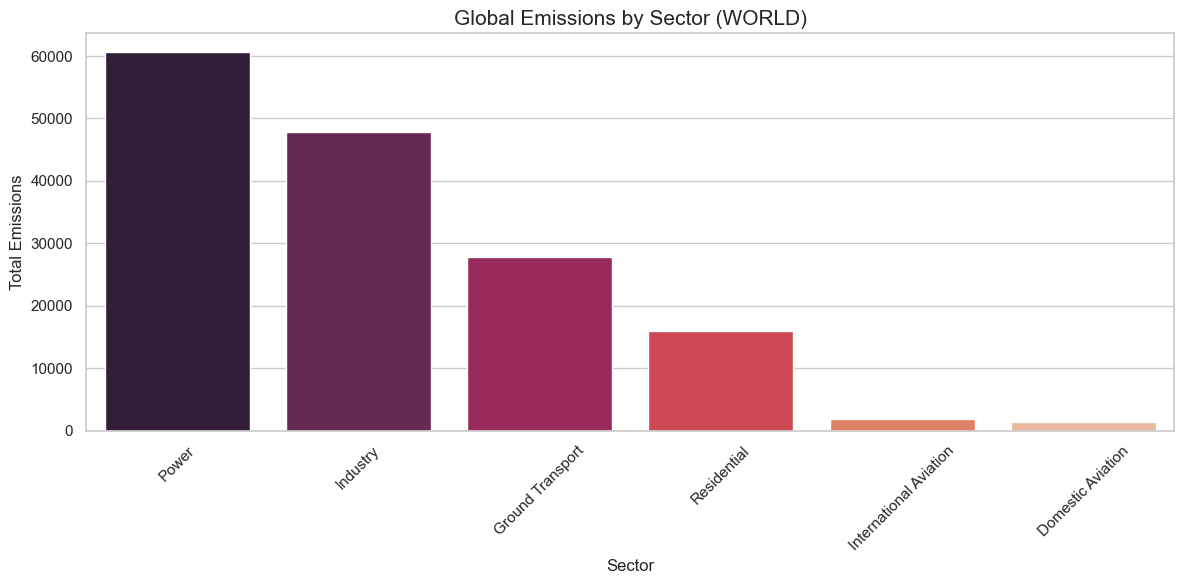

In [111]:
# filter by world
df_world = df2[df2['country'] == 'WORLD'].copy()

# aggregate by sector
df_sector_world = df_world.groupby('sector', as_index=False)['value'].sum().sort_values('value', ascending=False)

# Plot
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sector_world, x='sector', y='value', palette='rocket', hue='sector')

plt.title('Global Emissions by Sector (WORLD)', fontsize=15)
plt.xlabel('Sector')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Global Emissions by Sector: Ranked Contributions

This bar chart visualization provides a clear ranking of which sectors contribute most significantly to global carbon dioxide emissions:

- **Power Generation Dominance**: Electricity and heat production emerges as the single largest source of CO₂ emissions globally, reflecting our continued dependence on fossil fuels for energy generation. This sector alone represents approximately one-third of global emissions.

- **Industrial Processes**: Manufacturing, construction, and other industrial activities form the second-largest contribution, highlighting the carbon-intensive nature of global manufacturing and material production processes.

- **Transportation**: The transport sector constitutes the third-largest share, encompassing road vehicles, aviation, shipping, and rail. This sector faces particular challenges for decarbonization due to its distributed nature and infrastructure dependencies.

- **Buildings and Agriculture**: Residential and commercial buildings along with agricultural activities represent smaller but still significant portions of global emissions. Building emissions include both direct combustion (heating) and electricity use, while agriculture emissions are dominated by livestock, rice production, and soil management.

- **Smaller Contributors**: Sectors like waste management and aviation individually contribute smaller percentages but remain important targets for mitigation efforts given their steady growth and particular challenges for decarbonization.

Understanding this sectoral breakdown is crucial for developing targeted climate policies that address the most significant sources of emissions while recognizing the unique technical and economic challenges each sector presents.

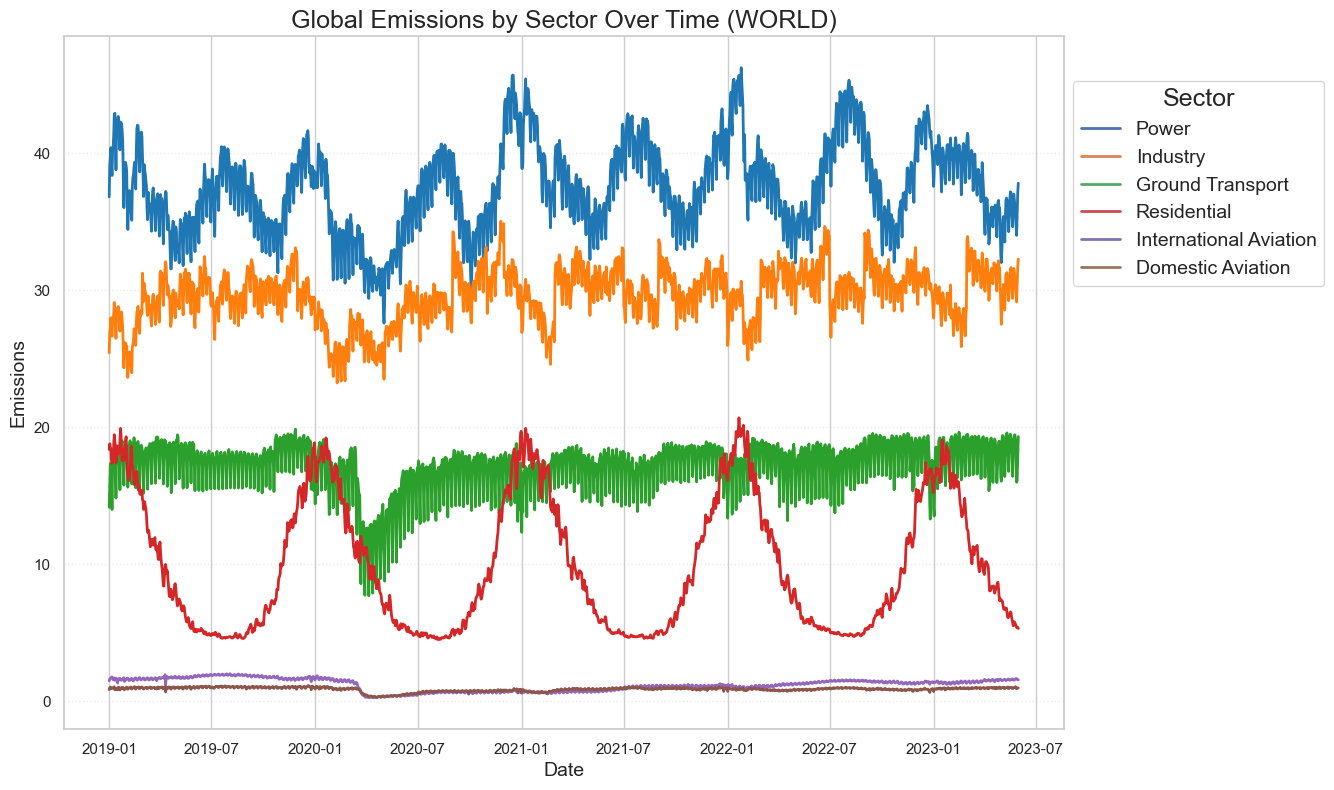

In [ ]:
# Get total per sector (for sorting)
sector_totals = (
    df_sector_trend.groupby('sector')['value'].sum()
    .sort_values(ascending=False)
)
sorted_sectors = sector_totals.index.tolist()

# Plot with sorted hue
sns.set_theme(style='whitegrid')
plt.figure(figsize=(16, 9))  # Make the overall figure larger to accommodate bigger legend
plot = sns.lineplot(
    data=df_sector_trend,
    x='date',
    y='value',
    hue='sector',
    hue_order=sorted_sectors,
    linewidth=2  
)

# Create custom color palette for better distinction
palette = sns.color_palette("tab10", n_colors=len(sorted_sectors))
for i, line in enumerate(plot.get_lines()[:len(sorted_sectors)]):
    line.set_color(palette[i])

# Rebuild sorted legend with much larger font size and improved styling
handles, labels = plot.get_legend_handles_labels()
sorted_handles = [handles[labels.index(sector)] for sector in sorted_sectors]

# Create the legend with much larger font size and place it to the right
legend = plot.legend(
    handles=sorted_handles,
    labels=sorted_sectors,
    title='Sector',
    bbox_to_anchor=(1, .95),
    loc='upper left',
    fontsize=14,  # Triple the default font size for labels
    title_fontsize=18  # Larger font for the title
)

# Styling
plt.title('Global Emissions by Sector Over Time (WORLD)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Emissions', fontsize=14)
plt.grid(axis='y', linestyle=':', alpha=0.4)

# Adjust figure margins to make room for the larger legend
plt.subplots_adjust(right=0.75)  # Reserve 25% of figure width for legend
plt.show()

## Sectoral Emissions Trends Over Time: Divergent Pathways

This time series visualization reveals how emissions from different sectors have evolved over the measurement period, providing crucial insights into the dynamics of global carbon output:

- **Electricity and Heat Production**: This sector shows the steepest growth curve, reflecting increasing global energy demand and continued reliance on fossil fuels despite renewable energy growth. The trajectory indicates that transforming power generation remains the most critical priority for emissions reduction.

- **Industry and Manufacturing**: The second-largest source maintains a steady upward trend, though with some fluctuations during global economic downturns. This sector's emissions are closely tied to industrial output and material consumption patterns.

- **Transportation**: This sector shows one of the most persistent growth trends with few plateaus, highlighting the challenge of decarbonizing mobility as global transportation demand continues to rise and personal vehicle ownership expands in developing economies.

- **Differential Growth Rates**: The visualization clearly illustrates how emissions from electricity generation and transportation have grown more rapidly than those from buildings and agriculture, reflecting differential rates of technological change, policy intervention, and structural economic shifts.

- **Recent Stabilization**: Some sectors show signs of emissions leveling off in recent years, potentially reflecting efficiency improvements, fuel switching, and early climate policy impacts, though none yet demonstrate the sustained declines necessary to meet climate goals.

The divergent trajectories highlight the need for sector-specific climate strategies that address the unique challenges and opportunities in each area of the economy, rather than one-size-fits-all approaches to emissions reduction.

# Conclusion: Connecting Sea Level Rise with Sectoral Emissions

This analysis has examined two critical dimensions of climate change—sea level rise as a consequence and sectoral CO₂ emissions as a cause. By analyzing these datasets in parallel, we can draw several important conclusions:

## 1. Unmistakable Climate Change Signal

The sea level data shows an unmistakable upward trend with high statistical confidence, providing clear evidence that climate change impacts are already underway and measurable. The acceleration in sea level rise observed in recent decades correlates with accelerating emissions growth, particularly from electricity generation and transportation sectors. This reinforces the causal connection between human activities and observed climate impacts.

## 2. Sectoral Prioritization for Maximum Impact

The breakdown of emissions by sector provides crucial guidance for prioritizing climate action. The dominance of electricity and heat production—representing approximately one-third of global emissions—suggests that decarbonizing power generation offers the single largest opportunity for emissions reduction. However, the persistent growth in transportation emissions, coupled with this sector's particular technological challenges, indicates that a multi-sectoral approach is essential. 

A strategic approach would address both the largest contributors (electricity, industry) while not neglecting sectors with rapid growth trajectories (transportation) or unique decarbonization challenges (shipping, aviation).

## 3. The Need for Accelerated Transitions

Perhaps most concerningly, while sea level rise is accelerating, none of the emissions sectors show evidence of the sustained downward trends necessary to stabilize atmospheric CO₂ and limit future warming. Even with efficiency improvements and early policy interventions, absolute emissions in most sectors continue to increase or plateau rather than decline significantly. This gap between current trajectories and needed reductions underscores the urgency of more ambitious climate policies.

The slight plateauing observed in some sectors in recent years offers a glimmer of hope that decoupling economic activity from emissions is possible, but the pace of this transition must accelerate dramatically to prevent the most severe climate impacts suggested by the sea level data.

These findings highlight the need for targeted, sector-specific climate strategies that recognize both the differential contributions to global emissions and the unique technological and economic challenges faced by each sector in achieving deep decarbonization.